In [1]:
import tensorflow as tf

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
import matplotlib.pyplot as plt

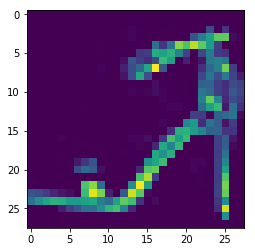

In [5]:
plt.imshow(X_train[8])
plt.show()

In [6]:
 X_train = tf.keras.utils.normalize(X_train, axis = 1)

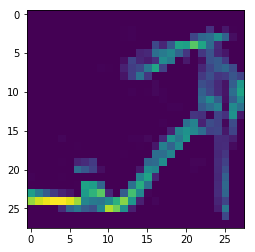

In [7]:
plt.imshow(X_train[8])
plt.show()

In [8]:
X_test = tf.keras.utils.normalize(X_test, axis = 1)

In [9]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, log = {}):
        if(log.get('loss') < 0.4):
            print('\nLoss is low so cancelling training')
            self.model.stop_training = True

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [11]:
y_train.min()

0

In [12]:
y_train.max()

9

In [13]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = tf.nn.softmax))

In [14]:
#model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], callbacks = [callbacks])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.5031 - acc: 0.8197
Epoch 2/10
60000/60000 [==============================] - 5s 92us/sample - loss: 0.3753 - acc: 0.8642
Epoch 3/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.3379 - acc: 0.8755
Epoch 4/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3120 - acc: 0.8849
Epoch 5/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2917 - acc: 0.8925
Epoch 6/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2756 - acc: 0.8964
Epoch 7/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2612 - acc: 0.9020
Epoch 8/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2502 - acc: 0.9053
Epoch 9/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2400 - acc: 0.9107
Epoch 10/10
60000/60000 [==============================] - 6s 93us/sample - loss: 

In [16]:
import pandas as pd

In [17]:
lost_df = pd.DataFrame(model.history.history)

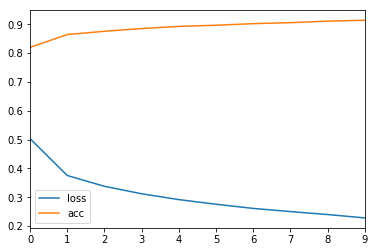

In [18]:
lost_df.plot()

In [19]:
model.evaluate(X_test, y_test, verbose = 0)

[0.32564184836745264, 0.8861]